<a href="https://colab.research.google.com/github/Sohammhatre10/Predicto/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
data_btc = 'DOGE-INR.csv'
df = pd.read_csv(data_btc)


FileNotFoundError: ignored

In [ ]:
df.info()

In [ ]:
df.describe()

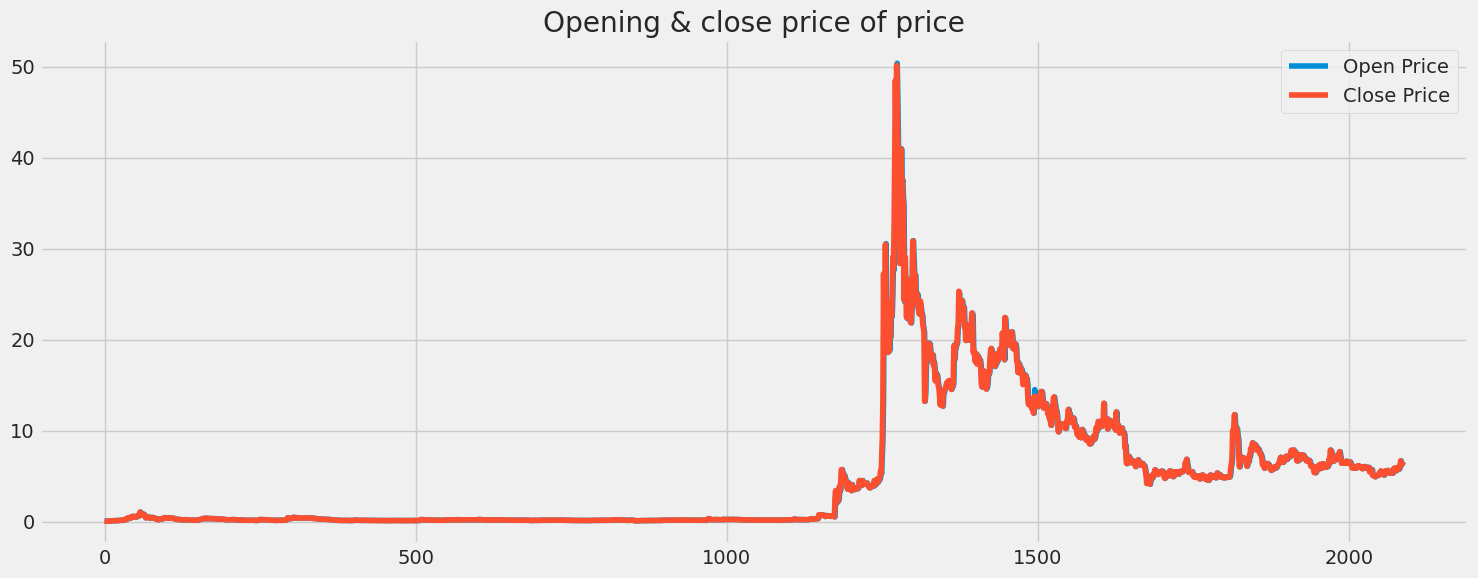

In [ ]:
plt.figure(figsize=(15,6))
df[r'Open'].plot()
df[r'Close'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('Opening & close price of price')
plt.legend(['Open Price','Close Price'])
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(15,6))
df[r'High'].plot()
df[r'Low'].plot()
plt.ylabel(None)
plt.xlabel(None)
plt.title('High & Low price of Bitcoin')
plt.legend(['High Price','Low Price'])
plt.tight_layout()
plt.show()

In [ ]:
n_cols = 1
dataset = df[r'Close']
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(2088, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(np.array(data))
train_size = int(len(data) * (0.75))
test_size = len(data) - train_size
print(train_size, test_size)

1566 522


In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(1566, 1)

In [ ]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1
for i in range(time_steps, len(train_data)):
  x_train.append(train_data[i-time_steps:i, :n_cols])
  y_train.append(train_data[i, :n_cols])
  if i<= time_steps:
    print(x_train)
    print(y_train)

[array([[0.00021197],
       [0.        ],
       [0.00023158],
       [0.00019585],
       [0.00039364],
       [0.00046159],
       [0.00035383],
       [0.00043126],
       [0.00043559],
       [0.00046043],
       [0.00044838],
       [0.00101   ],
       [0.00108591],
       [0.00111257],
       [0.0013236 ],
       [0.00126518],
       [0.00120778],
       [0.00168617],
       [0.00132161],
       [0.00132536],
       [0.00141526],
       [0.001416  ],
       [0.00151183],
       [0.00181437],
       [0.00183396],
       [0.00207807],
       [0.00215433],
       [0.00222526],
       [0.00201662],
       [0.00192632],
       [0.00224246],
       [0.00289573],
       [0.00310082],
       [0.00341111],
       [0.0034595 ],
       [0.00623521],
       [0.0062998 ],
       [0.00689028],
       [0.00589122],
       [0.00717119],
       [0.00813268],
       [0.00638192],
       [0.00792149],
       [0.00961139],
       [0.0100563 ],
       [0.01067582],
       [0.00999902],
       [0.00

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))
x_train.shape, y_train.shape

((1506, 60, 1), (1506, 1))

In [ ]:
model = Sequential([
    LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer = 'adam', loss = 'mse', metrics = 'mean_absolute_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 100, verbose=0, batch_size = 32)

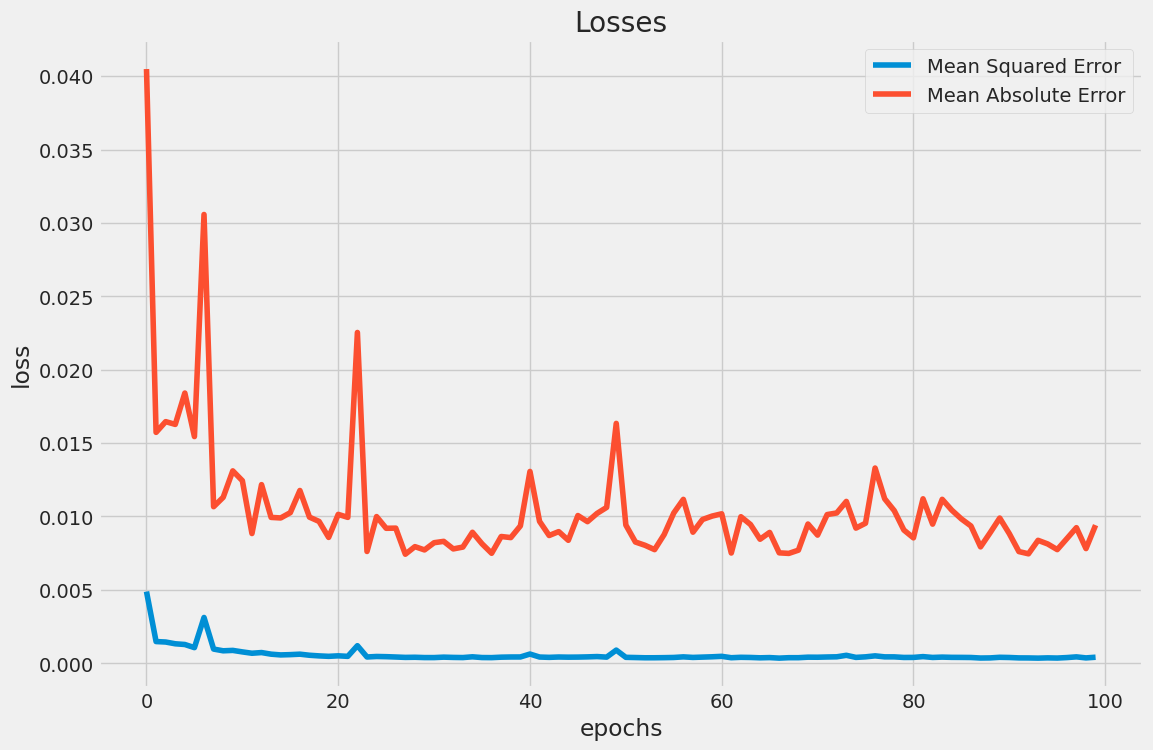

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Losses')
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.show()

In [ ]:
time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
  x_test.append(test_data[i-time_steps:i, 0:n_cols])
  y_test.append(test_data[i,0:n_cols])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
x_test.shape, y_test.shape

((522, 60, 1), (522, 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions.shape

17/17 [==============================] - 1s 21ms/step


(522, 1)

In [ ]:
y_test = scaler.inverse_transform(y_test)
rmse = np.sqrt(np.mean(y_test - predictions)**2).round(2)
rmse

0.11

In [ ]:
preds_acts = pd.DataFrame(data = {'Predictions': predictions.flatten(), 'Actuals': y_test.flatten()})

s = pd.Series([None, None])
for i in range(0,1506):
  preds_acts = preds_acts.append(s,ignore_index=True)
preds_acts

<ipython-input-153-3f9a62fd82bd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds_acts = preds_acts.append(s,ignore_index=True)
<ipython-input-153-3f9a62fd82bd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds_acts = preds_acts.append(s,ignore_index=True)
<ipython-input-153-3f9a62fd82bd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds_acts = preds_acts.append(s,ignore_index=True)
<ipython-input-153-3f9a62fd82bd>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  preds_acts = preds_acts.append(s,ignore_index=True)
<ipython-input-153-3f9a62fd82bd>:5: FutureWarning: The frame.append method is deprecated and will be removed

,Predictions,Actuals,0,1
0,9.708985,9.336537,NaN,NaN
1,9.524552,9.575237,NaN,NaN
2,9.577279,9.583143,NaN,NaN
3,9.671556,9.241720,NaN,NaN
4,9.516964,10.024691,NaN,NaN
...,...,...,...,...
2023,NaN,NaN,NaN,NaN
2024,NaN,NaN,NaN,NaN
2025,NaN,NaN,NaN,NaN
2026,NaN,NaN,NaN,NaN


In [ ]:
preds_acts['Predictions'].shift(1506)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2023    6.111468
2024    6.561662
2025    6.671087
2026    6.617060
2027    6.511834
Name: Predictions, Length: 2028, dtype: float32

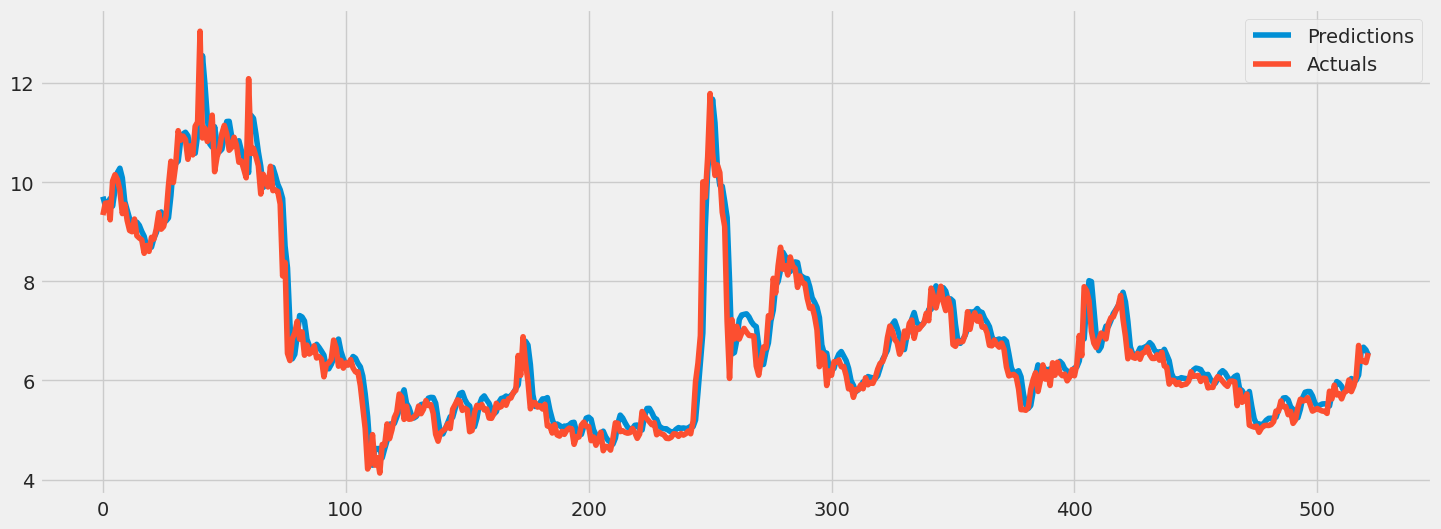

In [ ]:
plt.figure(figsize = (16,6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

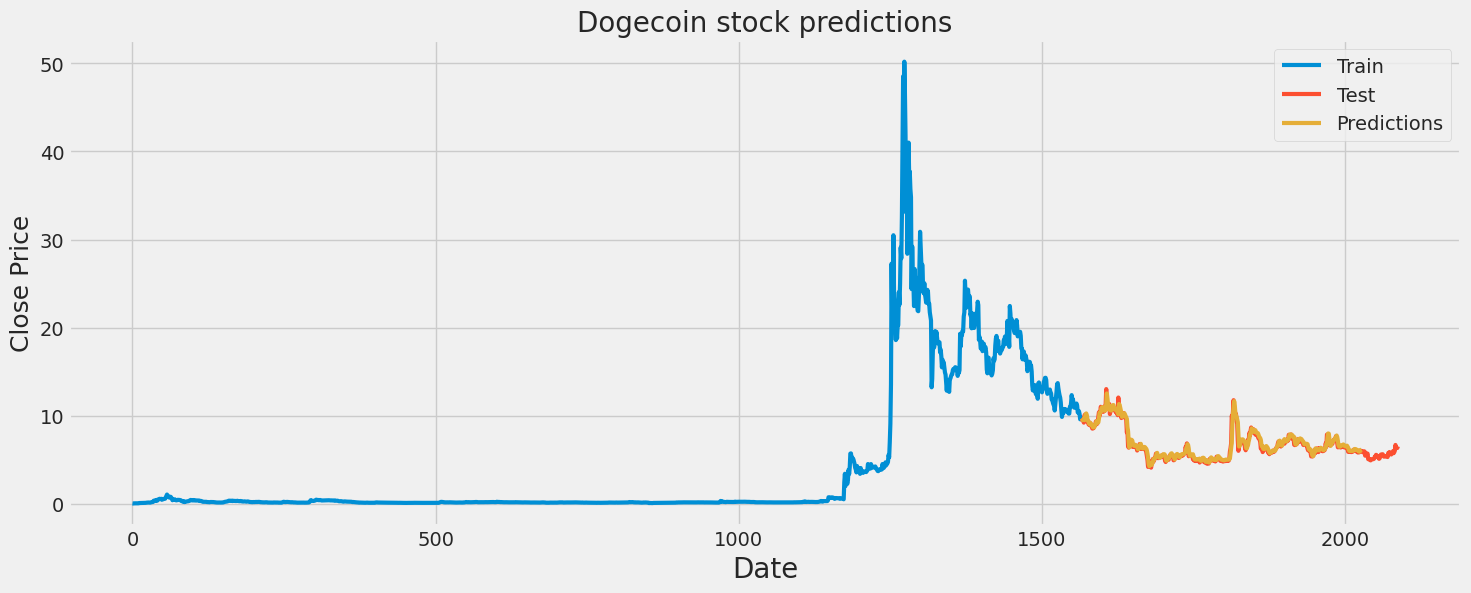

In [ ]:
plt.figure(figsize=(16, 6))
plt.title("Dogecoin stock predictions", fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price', fontsize=18)
plt.plot(dataset.iloc[:train_size]['Close'], linewidth=3)
plt.plot(dataset.iloc[train_size:]['Close'], linewidth=3)
plt.plot(preds_acts['Predictions'].shift(1566), linewidth = 3)
plt.legend(['Train', 'Test', 'Predictions'])